In [2]:
using LinearAlgebra
using CairoMakie

In [32]:
using Statistics
using Distributions
using Random
using GaussianMixtures

In [26]:
x = randn(1000)
function calculate_y(x)
    noise = randn()  # Add some random noise
    return 2x + noise
end
y = [calculate_y(xx) for xx in x]

1000-element Vector{Float64}:
  2.546009933891851
 -0.3108667853507776
  0.6263117919135699
 -0.12079637517758637
 -1.2148972611732027
 -0.8710696774394348
 -1.1217258218800348
  1.495393530081302
  2.4302672272531067
 -2.187160539628806
  ⋮
  0.32903245870146136
  1.2552926157568867
 -0.48541868138952826
  2.4949148027092596
 -3.1566162736139125
 -1.6688661338735176
  0.0566508038758039
 -0.840654519062948
  1.9682228752103175

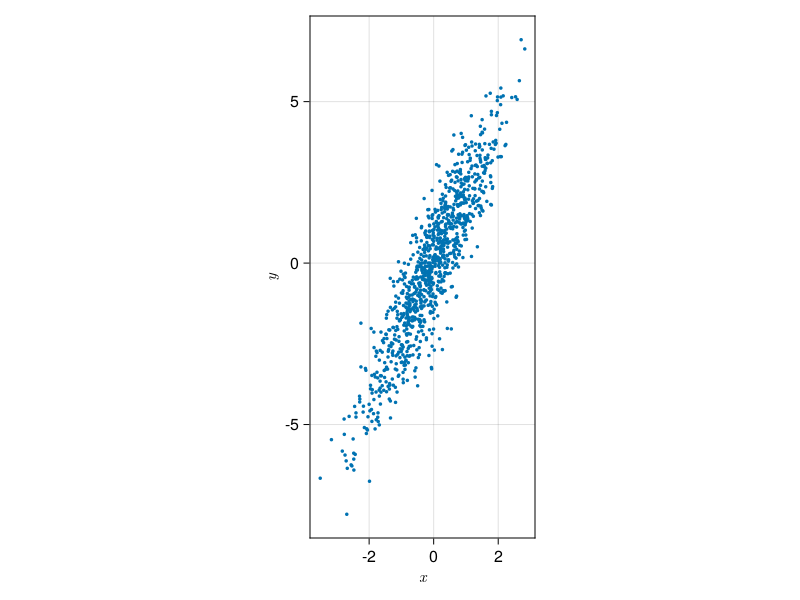

In [27]:
f = Figure()
ax = f[1,1] = Axis(f;aspect=DataAspect(),xlabel=L"x",ylabel=L"y")
scatter!(ax,x,y;markersize=5,label="sample")
f

In [28]:
x_matrix = zeros(2,1000)
x_matrix[1,:] .= x
x_matrix[2,:] .= y
x_matrix

2×1000 Matrix{Float64}:
 0.756449   0.512085  0.299814  …  -0.251612   -0.403534  0.957771
 2.54601   -0.310867  0.626312      0.0566508  -0.840655  1.96822

In [29]:
s = svd(x_matrix)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
2×2 Matrix{Float64}:
 -0.383269  -0.923637
 -0.923637   0.383269
singular values:
2-element Vector{Float64}:
 79.21584702434133
 12.79899259552514
Vt factor:
2×1000 Matrix{Float64}:
 -0.0333457   0.00114701  -0.00875323  …  0.000556839  0.0117542   -0.027583
  0.021652   -0.0462635   -0.00288097     0.019854     0.00394733  -0.0101784

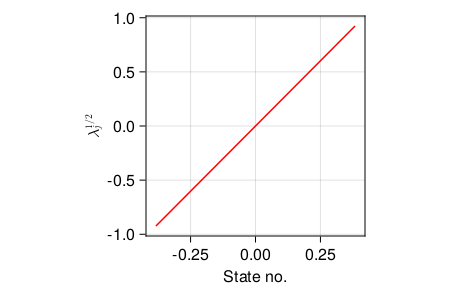

In [30]:
f = Figure(;resolution=(450,300))
ax = f[1,1] = Axis(f;aspect=1,xlabel="State no.",ylabel=L"λ_j^{1/2}")
max_data_dir = s.U[:,1]
xx = [-max_data_dir[1], max_data_dir[1]]
yy = [-max_data_dir[2], max_data_dir[2]]
lines!(ax,xx,yy;marker=:none,color=:red)
f

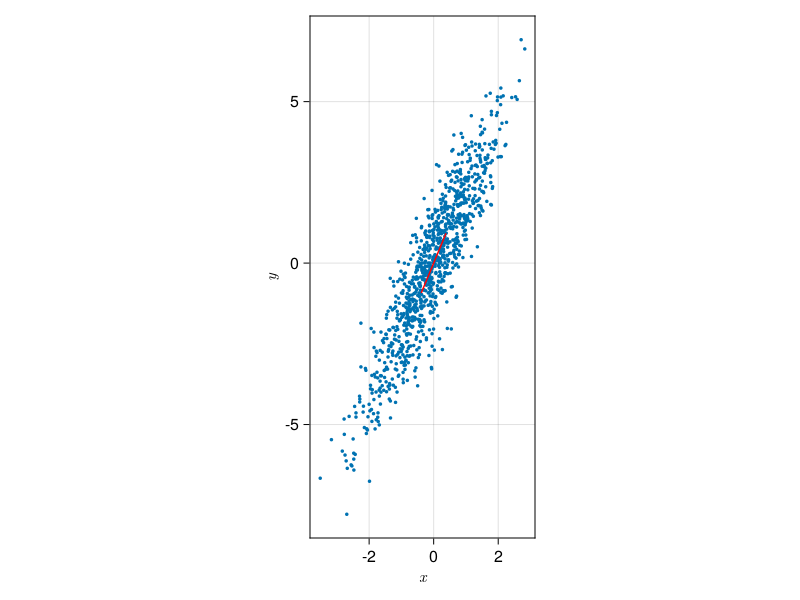

In [31]:
f = Figure()
ax = f[1,1] = Axis(f;aspect=DataAspect(),xlabel=L"x",ylabel=L"y")
scatter!(ax,x,y;markersize=5,label="sample")
lines!(ax,xx,yy;marker=:none,color=:red)
f

In [33]:
x_fulldata = zero(transpose(x_matrix))
x_fulldata .= transpose(x_matrix)
gm = GaussianMixtures.GMM(1,x_fulldata,kind=:full,method=:kmeans,nIter=30)

GMM{Float64} with 1 components in 2 dimensions and full covariance
Mix 1: weight 1.000000
 mean: [-0.035986228179078254, -0.07816343335559026]
 covariance: 2×2 Matrix{Float64}:
 1.06131  2.16277
 2.16277  5.37669


In [43]:
mean= [-0.035986228179078254, -0.07816343335559026]
Σ = [ 1.06131  2.16277
2.16277  5.37669]

2×2 Matrix{Float64}:
 1.06131  2.16277
 2.16277  5.37669

In [44]:
s_Σ = svd(Σ)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
2×2 Matrix{Float64}:
 -0.383227  -0.923654
 -0.923654   0.383227
singular values:
2-element Vector{Float64}:
 6.274028675642833
 0.16397132435716755
Vt factor:
2×2 Matrix{Float64}:
 -0.383227  -0.923654
 -0.923654   0.383227

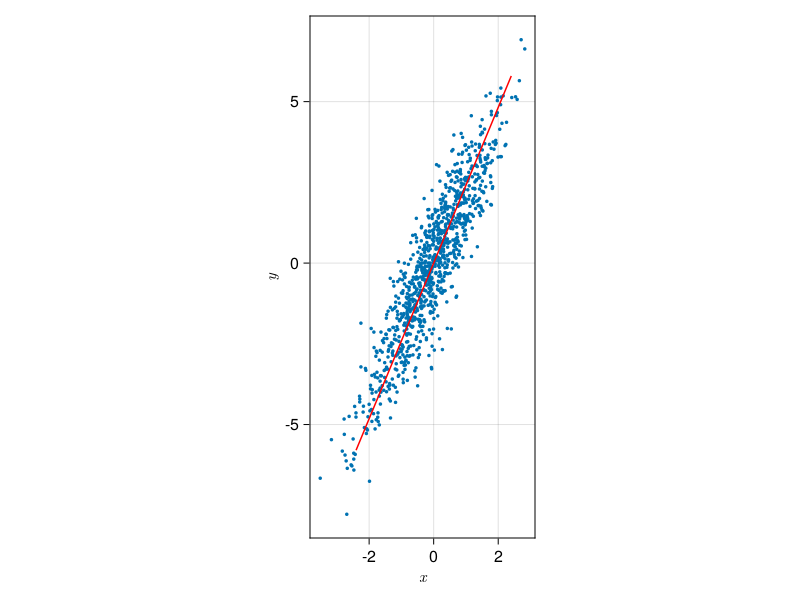

In [47]:
f = Figure()
ax = f[1,1] = Axis(f;aspect=DataAspect(),xlabel=L"x",ylabel=L"y")
max_unc_dir = s_Σ.U[:,1] .* s_Σ.S[1]
xΣ = [-max_unc_dir[1], max_unc_dir[1]]
yΣ = [-max_unc_dir[2], max_unc_dir[2]]
scatter!(ax,x,y;markersize=5,label="sample")
lines!(ax,xΣ,yΣ;marker=:none,color=:red)
f